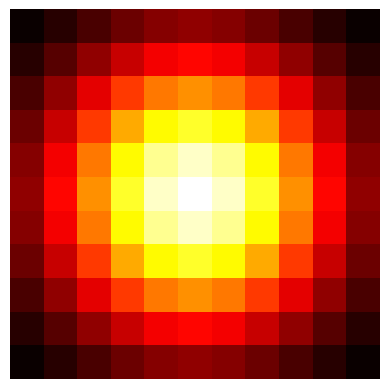

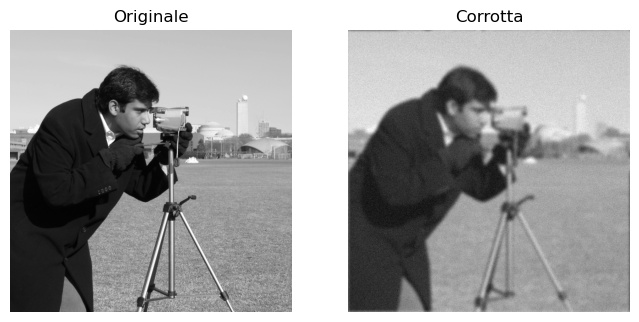

In [2]:
from ProblemiInversi import operators, solvers, utilities
import numpy as np
import matplotlib.pyplot as plt

from skimage import data

# Lettura dei dati da skimage
x = data.camera()
nx, ny = x.shape

# Normalizzazione (nel range [0, 1])
x = x / x.max()

# Definizione kernel di blur e operatore associato
kernel = utilities.gaussian2d_kernel(k=11, sigma=3)
A = operators.ConvolutionOperator(kernel)

# Visualizzazione kernel di blur (PSF)
plt.imshow(kernel, cmap='hot')
plt.axis('off')
plt.show()

# Sfocatura dell'immagine e aggiunta di rumore
y = A(x)
y_delta = y + utilities.gaussian_noise(y, noise_level=0.05)

# Visualizzazione problema test
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(x, cmap="gray")
plt.title("Originale")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(y_delta, cmap="gray")
plt.axis("off")
plt.title("Corrotta")
plt.show()

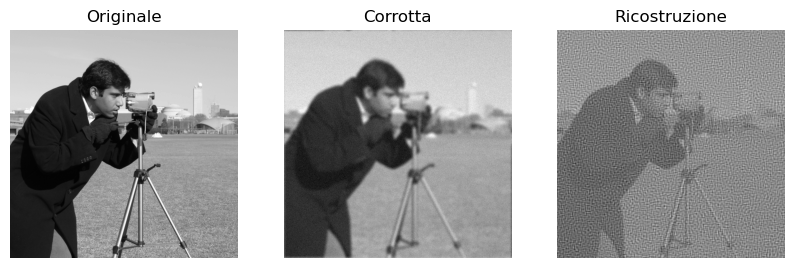

In [3]:
# CGLS
cgls_solver = solvers.CGLS(A)

# Scelta di x0, kmax, atolf, tolx
x0 = np.zeros_like(x)
kmax = 30
tolf = 1e-8
tolx = 1e-8

# Soluzione
x_cgls = cgls_solver.solve(y_delta, x0, kmax, tolf, tolx)

# Visualizzazione ricostruzione
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plt.imshow(x, cmap="gray")
plt.title("Originale")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(y_delta, cmap="gray")
plt.axis("off")
plt.title("Corrotta")

plt.subplot(1, 3, 3)
plt.imshow(x_cgls, cmap="gray")
plt.axis("off")
plt.title("Ricostruzione")
plt.show()

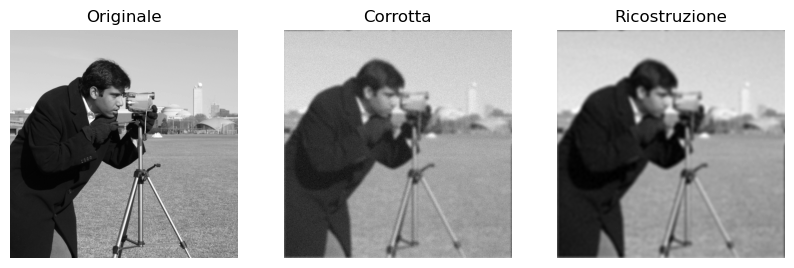

In [4]:
# Tikhonov

# Scelta parametri Tikhonov (L e lambda)
L = operators.Identity()
lmbda = 1

# Costruzione operatore di Tikhonov
M = operators.TikhonovOperator(A, L, lmbda)

# Definizione dati estesi ybar e ybar_delta
ybar = np.pad(y, ((0, 512), (0, 0)))
ybar_delta = np.pad(y_delta, ((0, 512), (0, 0)))

# Solver CGLS + Tikhonov
cgls_tik_solver = solvers.CGLS(M)

# Scelta di x0, kmax, tolf, tolx
x0 = np.zeros_like(x)
kmax = 100
tolf = 1e-8
tolx = 1e-8

# Soluzione
x_tik = cgls_tik_solver.solve(ybar_delta, x0, kmax, tolf, tolx)

# Visualizzazione ricostruzione
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plt.imshow(x, cmap="gray")
plt.title("Originale")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(y_delta, cmap="gray")
plt.axis("off")
plt.title("Corrotta")

plt.subplot(1, 3, 3)
plt.imshow(x_tik, cmap="gray")
plt.axis("off")
plt.title("Ricostruzione")
plt.show()

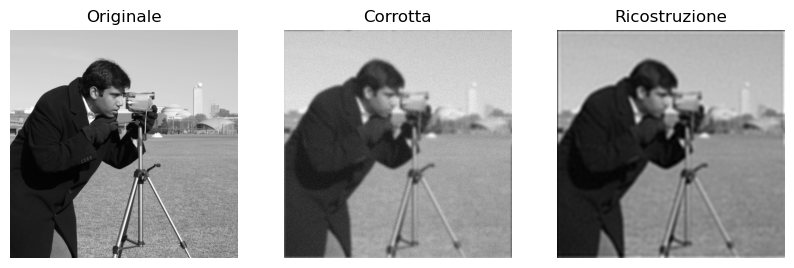

In [5]:
# Tikhonov Gradiente

# Scelta parametri Tikhonov (L e lambda)
L = operators.Gradient()
lmbda = 1

# Costruzione operatore di Tikhonov
M = operators.TikhonovOperator(A, L, lmbda)

# Definizione dati estesi ybar e ybar_delta
ybar = np.pad(y, ((0, 1024), (0, 0)))
ybar_delta = np.pad(y_delta, ((0, 1024), (0, 0)))

# Solver CGLS + Tikhonov
cgls_tik_solver = solvers.CGLS(M)

# Scelta di x0, kmax, tolf, tolx
x0 = np.zeros_like(x)
kmax = 100
tolf = 1e-8
tolx = 1e-8

# Soluzione
x_tik = cgls_tik_solver.solve(ybar_delta, x0, kmax, tolf, tolx)

# Visualizzazione ricostruzione
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plt.imshow(x, cmap="gray")
plt.title("Originale")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(y_delta, cmap="gray")
plt.axis("off")
plt.title("Corrotta")

plt.subplot(1, 3, 3)
plt.imshow(x_tik, cmap="gray")
plt.axis("off")
plt.title("Ricostruzione")
plt.show()

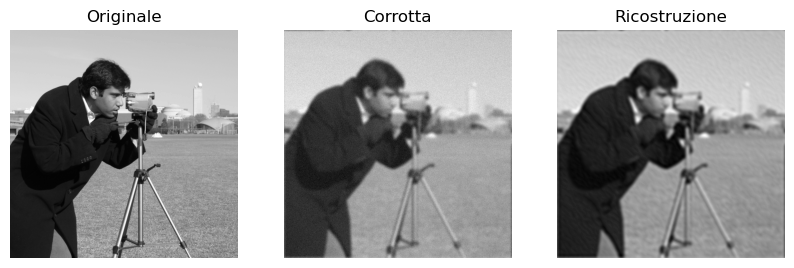

In [17]:
# Total Variation con Discesa Gradiente

# Solver per Total Variation
gd_tv_solver = solvers.GDTotalVariation(A, beta=1e-3)

# Scelta parametri TV (beta e lambda)
beta = 1e-3
lmbda = 1e-2

# Scelta di x0, kmax, tolf, tolx
x0 = np.zeros_like(x)
kmax = 100
tolf = 1e-8
tolx = 1e-8

# Soluzione
x_TV, obj_val, grad_norm = gd_tv_solver.solve(y_delta, lmbda, x0, kmax, tolf, tolx)

# Visualizzazione ricostruzione
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plt.imshow(x, cmap="gray")
plt.title("Originale")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(y_delta, cmap="gray")
plt.axis("off")
plt.title("Corrotta")

plt.subplot(1, 3, 3)
plt.imshow(x_TV, cmap="gray")
plt.axis("off")
plt.title("Ricostruzione")
plt.show()

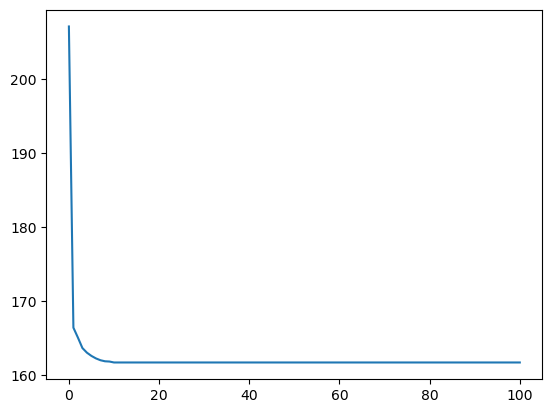

In [19]:
plt.plot(obj_val)
plt.show()